In [1]:
# Data manipulation and analysis
import pandas as pd

# Numerical operations
import numpy as np

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define file paths
base_path = '/content/drive/MyDrive/Colab Notebooks/DNS DATASET/'

benign_path   = base_path + 'CSV_benign.csv'
malware_path  = base_path + 'CSV_malware.csv'
phishing_path = base_path + 'CSV_phishing.csv'
spam_path     = base_path + 'CSV_spam.csv'

In [4]:
# Read CSVs and skip problematic lines
df_benign   = pd.read_csv(benign_path, on_bad_lines='skip', low_memory=False)
df_malware  = pd.read_csv(malware_path, on_bad_lines='skip', low_memory=False)
df_phishing = pd.read_csv(phishing_path, on_bad_lines='skip', low_memory=False)
df_spam     = pd.read_csv(spam_path, on_bad_lines='skip', low_memory=False)

print("✅ All CSVs successfully loaded!")

✅ All CSVs successfully loaded!


In [5]:
# Let's peek into the datasets
print("Benign Dataset:")
print(df_benign.head())

Benign Dataset:
                                                                                                                                                                               Country  \
US  15169.0  46   172.217.1.174   b'google.com.'     CA  NaN US  1997-09-15 04:00:00 0 0 ['GOOGLE.COM'  'google.com'] 1.0  0   Google LLC 7      google 0    -1.0 ['g' 'o' 'o'     'g'   
NaN NaN      299  NaN             b'google.com.'     CA  NaN US  1997-09-15 04:00:00 0 0 ['GOOGLE.COM'  'google.com'] 1.0  0   Google LLC 7      google 0    -1.0 ['g' 'o' 'o'     'g'   
             38   NaN             b'www.google.com.' NaN NaN NaN 1997-09-15 04:00:00 0 0 GOOGLE.COM    1.0            1    NaN 10         google 0      -1.0 ['g'  'o' 'o' 'g'     'l'   
US  15169.0  299  172.217.164.228 b'www.google.com.' NaN NaN NaN NaN                 0 0 NaN           NaN            1    NaN 10         google 0      -1.0 ['g'  'o' 'o' 'g'     'l'   
    714.0    2126 17.178.96.59    b'apple.com.'      C

In [6]:
print("\nMalware Dataset:")
print(df_malware.head())


Malware Dataset:
                                                                                                                                                                                                                                                                                                                                                                                                                                             Country  \
US 26347.0  14399 67.205.14.183  b'dicrophani.com.' 0 hani DICROPHANI.COM 0 0 dicrophani NaN 0 4277 days 21:07:56.450015 2.9631196533066344 6.0 ['abuse@name.com'        'roxics@gmail.com']    2008-08-04 04:20:05 Scape Films               defaultdict(<class 'int'>  {'d': 1                  'n': 1    'a': 1 'i': 2 'r': 1    'h': 1  'c': 1    'o': 1  'p': 1}) ['di'  'ic'   'cr'  'ro'   'op'       'ph'  'ha'  'an'                  'ni']   
   46606.0  14399 70.40.220.126  b'dionneg.com.'    0 dio  DIONNEG.COM    0 0 dionneg    NaN 0 4596 da

In [7]:

print("\nPhishing Dataset:")
print(df_phishing.head())


Phishing Dataset:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [8]:
print("\nSpam Dataset:")
print(df_spam.head())


Spam Dataset:
                                                                                                                                                                                                                      Country  \
JP 2516.0 59 119.82.155.98 b'0900259.com.' 0900259 Tokyo [('qq.com'    86) ('vk.com'       86)] 0 8 0 -1 0 NaN ['090' '900' '002' '025'   '259'] Whois Privacy Protection Service by onamae.com -1.0 com GMO INTERNET    INC.   
US 6939.0 59 65.19.180.78  b'1a2n-f9.jp.'  1a2n-f9 NaN   [('1and1.fr'  56) ('hatena.ne.jp' 55)] 0 8 0 -1 0 NaN ['1a2' 'a2n' '2n-' 'n-f'   '-f9'] NaN                                            -1.0 jp  NaN                0   
                           b'6-2m3kf.jp.'  6-2m3kf NaN   [('nhk.or.jp' 50) ('t.me'         45)] 0 8 0 -1 0 NaN ['6-2' '-2m' '2m3' 'm3k'   '3kf'] NaN                                            -1.0 jp  NaN                0   
                           b'6f4n-8w.jp.'  6f4n-8w NaN   [('ocn.ne.jp' 53) ('nhk.or.j

In [9]:
# Assigning class labels to each dataset
df_benign['label']   = 'benign'
df_malware['label']  = 'malware'
df_phishing['label'] = 'phishing'
df_spam['label']     = 'spam'

print("✅ Labels assigned successfully.")

✅ Labels assigned successfully.


In [10]:
# Combine all labeled datasets into one
df_all = pd.concat([df_benign, df_malware, df_phishing, df_spam], ignore_index=True)

print("✅ All datasets merged into one.")
print("🧾 Final Shape:", df_all.shape)
df_all.head()

✅ All datasets merged into one.
🧾 Final Shape: (120616, 39)


,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,...,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank,label
0,'g','l','e'],0,1.8348756474779464,8256 days,11:53:49.631067,com,0,0,...,'oo','og','gl','le'],MarkMonitor,Inc.,google,8.0,-1.0,benign
1,'g','l','e'],0,1.8348756474779464,8256 days,11:53:50.479085,com,0,0,...,'oo','og','gl','le'],MarkMonitor,Inc.,google,8.0,-1.0,benign
2,'l','e'],0,2.1142465351822795,8256 days,11:53:51.264191,com,0,0,abusecomplaints@markmonitor.com,...,'og','gl','le'],MarkMonitor Inc.,google,4.0,-1.0,NaN,NaN,benign
3,'l','e'],0,2.1142465351822795,NaN,com,0,0,NaN,0.0,...,'gl','le'],NaN,google,NaN,NaN,NaN,NaN,NaN,benign
4,'l','e'],0,1.8208020839342969,12117 days,10:54:14.333863,com,0,0,['domainabuse@cscglobal.com',...,'pl','le'],CSC CORPORATE DOMAINS,INC.,apple,8.0,-1.0,NaN,NaN,benign


In [11]:
# Check how many samples we have of each class
df_all['label'].value_counts()

,count
label,
benign,111667
phishing,4939
malware,2896
spam,1114


In [12]:
# Check total missing values in each column
df_all.isnull().sum()

,0
Country,4674
ASN,6694
TTL,7089
IP,7546
Domain,10118
State,14648
Registrant_Name,15099
Country.1,17116
Creation_Date_Time,19011
hex_32,10518


✅ Strategy to Clean It Up
 1. **Drop Columns with Too Many Nulls (over 60–70%)**

In [13]:
# Set a threshold (e.g. 0.6 → 60% nulls = drop)
threshold = 0.6
df_all = df_all.loc[:, df_all.isnull().mean() < threshold]

print("✅ Dropped high-null columns. Remaining shape:", df_all.shape)

✅ Dropped high-null columns. Remaining shape: (120616, 34)


. Keep Mid-Null Columns & Decide Case-by-Case
For columns that are still useful and only 10–30% missing (like subdomain, len, Country, etc.), we can:

🅰️ Fill with placeholders (if categorical):

In [14]:
df_all['Country'].fillna("Unknown", inplace=True)
df_all['subdomain'].fillna("None", inplace=True)

🅱️ Fill with median/mean (if numerical):

In [15]:
# Peek at unique weird values (optional)
df_all['len'].unique()[:10]

array([' 100)', ' 95)]', '0', "['you'", "['vim'", " {'o': 2", " {'t': 1",
       ' 86)]', ' 87)]', "['yah'"], dtype=object)

In [16]:
# This will convert valid numbers and turn junk into NaN
df_all['len'] = pd.to_numeric(df_all['len'], errors='coerce')

In [17]:
df_all['entropy'] = pd.to_numeric(df_all['entropy'], errors='coerce')

Fill Missing Values

In [18]:
# Now we can safely fill
df_all['len'].fillna(df_all['len'].median(), inplace=True)
df_all['entropy'].fillna(df_all['entropy'].mean(), inplace=True)

In [19]:
# Clean all numeric columns that might be dirty
for col in ['len', 'entropy', 'numeric_percentage', 'Domain_Age']:
    if col in df_all.columns:
        df_all[col] = pd.to_numeric(df_all[col], errors='coerce')
        df_all[col].fillna(df_all[col].median(), inplace=True)

To ckeck all the null values

In [20]:
df_all.isnull().sum().sum() == 0

np.False_

In [21]:
# Shows all columns with remaining nulls (and how many)
df_all.isnull().sum().sort_values(ascending=False)

,0
char_distribution,67407
3gram,61285
oc_8,50525
typos,45335
puny_coded,41480
Emails,26880
dec_32,22854
dec_8,20930
Creation_Date_Time,19011
Country.1,17116


In [22]:
columns_to_drop = [
    'char_distribution', '3gram', 'oc_8', 'typos', 'puny_coded', 'Emails',
    'dec_32', 'dec_8', 'Creation_Date_Time', 'Country.1', 'Registrant_Name',
    'State', 'tld', 'obfuscate_at_sign', 'hex_32', 'Domain', 'shortened',
    'IP', 'Alexa_Rank', '1gram', 'TTL', 'oc_32', 'ASN', 'Domain_Name',
    'hex_8', 'Organization', 'longest_word'
]

df_all.drop(columns=[col for col in columns_to_drop if col in df_all.columns], inplace=True)
print("✅ Dropped unnecessary columns. Current shape:", df_all.shape)


✅ Dropped unnecessary columns. Current shape: (120616, 7)


In [23]:
# Check again to confirm 0 missing values
df_all.isnull().sum().sum() == 0  # Should return True

np.True_

In [24]:
df_all.shape

(120616, 7)

In [25]:
df_all.tail()

,Country,subdomain,len,entropy,Domain_Age,numeric_percentage,label
120611,0,0,0.0,10685.977089,0.0,2.125,spam
120612,Unknown,0.0,0.0,10685.977089,0.0,0.000,spam
120613,{'r': 1,0,0.0,10685.977089,0.0,0.000,spam
120614,{'r': 1,0,0.0,10685.977089,0.0,0.000,spam
120615,0,0,0.0,10685.977089,0.0,0.000,spam


✅ Step 10: Label Encoding (target column: label)
🔹 A. Check Unique Classes (just for our record)

In [26]:
df_all['label'].unique()

array(['benign', 'malware', 'phishing', 'spam'], dtype=object)

**Encode Labels to Numbers**

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_all['label'] = label_encoder.fit_transform(df_all['label'])

# Mapping of original labels to numbers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("🔐 Label Mapping:", label_mapping)

🔐 Label Mapping: {'benign': np.int64(0), 'malware': np.int64(1), 'phishing': np.int64(2), 'spam': np.int64(3)}


C. Separate Features (X) & Target (y)

In [28]:
X = df_all.drop(columns=['label'])  # features
y = df_all['label']                 # target

print("🧠 Features shape:", X.shape)
print("🎯 Target shape:", y.shape)

🧠 Features shape: (120616, 6)
🎯 Target shape: (120616,)


In [29]:
df_all.head()

,Country,subdomain,len,entropy,Domain_Age,numeric_percentage,label
0,'g',0,0.0,10685.977089,0.0,0.0,0
1,'g',0,0.0,10685.977089,0.0,0.0,0
2,'l',100),0.0,10685.977089,0.0,0.0,0
3,'l',('google.com.br',0.0,10685.977089,0.0,0.0,0
4,'l',0,0.0,10685.977089,0.0,0.0,0


✅ Step 11: Train-Test Split
This divides your data into:

X_train, X_test ➤ feature sets

y_train, y_test ➤ labels (encoded)

In [30]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # ensures class balance
)

print("✅ Train shape:", X_train.shape)
print("✅ Test shape:", X_test.shape)

✅ Train shape: (96492, 6)
✅ Test shape: (24124, 6)


✅ Check Label Balance (Just to be sure)

In [31]:
print("🎯 Train label balance:\n", y_train.value_counts(normalize=True))
print("\n🎯 Test label balance:\n", y_test.value_counts(normalize=True))

🎯 Train label balance:
 label
0    0.925807
2    0.040946
1    0.024012
3    0.009234
Name: proportion, dtype: float64

🎯 Test label balance:
 label
0    0.925800
2    0.040955
1    0.024001
3    0.009244
Name: proportion, dtype: float64


 A. Import & Train the Model

In [32]:
# Check which columns in X_train are not numeric
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['Country', 'subdomain'], dtype='object')


In [33]:
list(non_numeric_cols)

['Country', 'subdomain']

In [34]:
# Force everything in 'Country' to be string before encoding
X_train['Country'] = X_train['Country'].astype(str)
X_test['Country'] = X_test['Country'].astype(str)

# Combine for fitting
all_countries = pd.concat([X_train['Country'], X_test['Country']], axis=0)

# Fit label encoder
country_encoder = LabelEncoder()
country_encoder.fit(all_countries)

# Now safely encode both sets
X_train['Country'] = country_encoder.transform(X_train['Country'])
X_test['Country'] = country_encoder.transform(X_test['Country'])

print("✅ Country encoded successfully and safely as strings.")

✅ Country encoded successfully and safely as strings.


**Final Check — Drop subdomain if still exists**

In [35]:
if 'subdomain' in df_all.columns:
    df_all.drop(columns=['subdomain'], inplace=True)

In [36]:
X = df_all.drop(columns=['label'])
y = df_all['label']

**Step 3: Train-Test Split**

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

print("✅ Train/Test split complete.")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

✅ Train/Test split complete.
Train shape: (96492, 5)
Test shape: (24124, 5)


**Clean inf / NaN (Just In Case)**

In [38]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train.fillna(X_train.median(numeric_only=True), inplace=True)
X_test.fillna(X_test.median(numeric_only=True), inplace=True)

**MODEL 1: Random Forest Classifier**

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

**FIX THIS: Detect Non-Numeric Columns**

In [41]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("🧨 Non-numeric columns:", non_numeric_cols)

🧨 Non-numeric columns: Index(['Country'], dtype='object')


In [42]:
X_train.drop(columns=non_numeric_cols, inplace=True)
X_test.drop(columns=non_numeric_cols, inplace=True)
print("Dropped non-numeric columns for clean modeling.")

Dropped non-numeric columns for clean modeling.


In [43]:
#Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [44]:
# Predict
y_pred_rf = rf_model.predict(X_test)

In [45]:
# Evaluate
print("🎯 Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\n📋 Classification Report (RF):\n", classification_report(y_test, y_pred_rf))

🎯 Accuracy (Random Forest): 0.1537473055877964

📋 Classification Report (RF):
               precision    recall  f1-score   support

           0       1.00      0.11      0.20     22334
           1       0.43      0.44      0.44       579
           2       0.05      1.00      0.09       988
           3       1.00      0.03      0.05       223

    accuracy                           0.15     24124
   macro avg       0.62      0.39      0.19     24124
weighted avg       0.95      0.15      0.20     24124



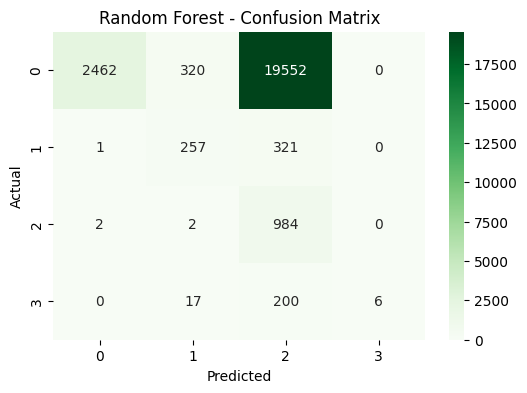

In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**MODEL 2: XGBoost Classifier**

In [47]:
!pip install xgboost

In [48]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

In [49]:
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("🎯 Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("\n📋 Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

🎯 Accuracy (XGBoost): 0.9334272923229978

📋 Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.93      1.00      0.97     22334
           1       0.86      0.32      0.46       579
           2       0.86      0.01      0.01       988
           3       1.00      0.03      0.05       223

    accuracy                           0.93     24124
   macro avg       0.91      0.34      0.37     24124
weighted avg       0.93      0.93      0.91     24124



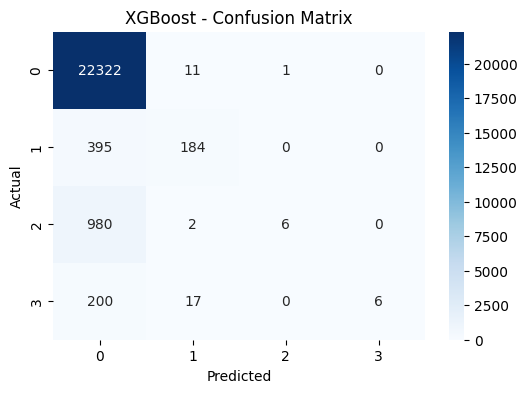

In [50]:
# Heatmap
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Class Distribution Comparison (Actual vs Predicted)**

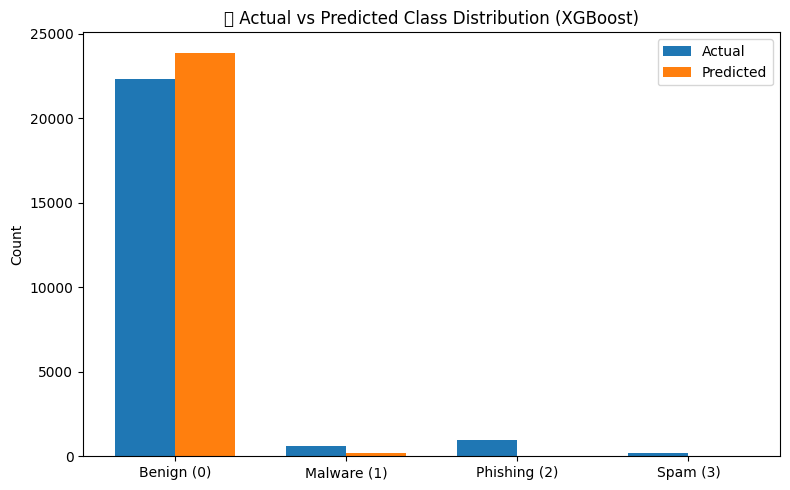

In [51]:
import matplotlib.pyplot as plt

# Actual class distribution
actual_counts = pd.Series(y_test).value_counts().sort_index()
# Predicted class distribution
predicted_counts = pd.Series(y_pred_xgb).value_counts().sort_index()

# Plot side-by-side
fig, ax = plt.subplots(figsize=(8, 5))
width = 0.35
classes = [0, 1, 2, 3]

bar1 = ax.bar([x - width/2 for x in classes], actual_counts, width, label='Actual')
bar2 = ax.bar([x + width/2 for x in classes], predicted_counts, width, label='Predicted')

ax.set_xticks(classes)
ax.set_xticklabels(['Benign (0)', 'Malware (1)', 'Phishing (2)', 'Spam (3)'])
ax.set_ylabel('Count')
ax.set_title('📊 Actual vs Predicted Class Distribution (XGBoost)')
ax.legend()
plt.tight_layout()
plt.show()

If Predicted class 0 is way higher than others → the model is biased.

If class 2 and 3 are almost empty → it’s missing phishing/spam.

The model is heavily biased toward class 0 (Benign), and practically ignoring class 2 (Phishing) and class 3 (Spam).

You’re feeding it imbalanced data → it learns to predict mostly the dominant class (Benign).

✅ Step 1: Apply SMOTE to Training Set Only

In [52]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("🔁 After SMOTE:")
print(pd.Series(y_train_smote).value_counts())

🔁 After SMOTE:
label
2    89333
0    89333
1    89333
3    89333
Name: count, dtype: int64


**✅ Step 2: Re-train XGBoost on SMOTE Data**

In [53]:
xgb_model_smote = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

xgb_model_smote.fit(X_train_smote, y_train_smote)

y_pred_xgb_smote = xgb_model_smote.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("🎯 Accuracy (XGBoost + SMOTE):", accuracy_score(y_test, y_pred_xgb_smote))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_xgb_smote))

🎯 Accuracy (XGBoost + SMOTE): 0.13874150223843476

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.09      0.17     22334
           1       0.36      0.44      0.39       579
           2       0.05      0.99      0.09       988
           3       0.06      0.03      0.04       223

    accuracy                           0.14     24124
   macro avg       0.37      0.39      0.17     24124
weighted avg       0.94      0.14      0.17     24124



What Just Happened:
SMOTE worked in balancing the training data

But the model overfit on minority class (esp. class 2)

Now it's recalling class 2 like crazy (0.99) but failing everywhere else

*   **MODEL 3: MLP (Multi-Layer Perceptron)**
*   **With class weights to balance, and deep pattern learning**


In [54]:
#Learns deep, nonlinear patterns

#Can work well with class imbalance using class_weight='balanced'

#Might just bring back precision and recall balance you’re looking for

In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
!pip install -U scikit-learn

In [58]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, weights))

print("Class weights:", class_weight_dict)

Class weights: {np.int64(0): np.float64(0.2700345896813048), np.int64(1): np.float64(10.411307725507122), np.int64(2): np.float64(6.105542900531511), np.int64(3): np.float64(27.074074074074073)}


In [59]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_mlp, y_train_mlp = sm.fit_resample(X_train, y_train)

print("✅ After SMOTE (MLP version):")
print(pd.Series(y_train_mlp).value_counts())


✅ After SMOTE (MLP version):
label
2    89333
0    89333
1    89333
3    89333
Name: count, dtype: int64


In [60]:
from sklearn.neural_network import MLPClassifier

# Initialize the model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    verbose=True
)

# Train on SMOTE-balanced data
mlp_model.fit(X_train_mlp, y_train_mlp)

Iteration 1, loss = 20.39608806
Validation score: 0.242710
Iteration 2, loss = 16.86492838
Validation score: 0.257822
Iteration 3, loss = 9.92477648
Validation score: 0.320227
Iteration 4, loss = 6.02677457
Validation score: 0.319108
Iteration 5, loss = 2.51718918
Validation score: 0.304024
Iteration 6, loss = 1.34222840
Validation score: 0.320899
Iteration 7, loss = 1.29875648
Validation score: 0.320983
Iteration 8, loss = 1.29271499
Validation score: 0.320955
Iteration 9, loss = 1.30658850
Validation score: 0.312112
Iteration 10, loss = 1.29640617
Validation score: 0.320787
Iteration 11, loss = 1.29277831
Validation score: 0.320955
Iteration 12, loss = 1.29257709
Validation score: 0.312420
Iteration 13, loss = 1.29676879
Validation score: 0.320787
Iteration 14, loss = 1.29322560
Validation score: 0.320703
Iteration 15, loss = 1.29290985
Validation score: 0.320843
Iteration 16, loss = 1.29289075
Validation score: 0.321095
Iteration 17, loss = 1.31248489
Validation score: 0.320899
Iter

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=500,
              random_state=42, verbose=True)

🎯 Accuracy (MLP): 0.05633394130326646

📋 Classification Report (MLP):
               precision    recall  f1-score   support

           0       0.99      0.01      0.02     22334
           1       0.37      0.28      0.32       579
           2       0.04      0.99      0.08       988
           3       1.00      0.01      0.03       223

    accuracy                           0.06     24124
   macro avg       0.60      0.33      0.11     24124
weighted avg       0.94      0.06      0.03     24124



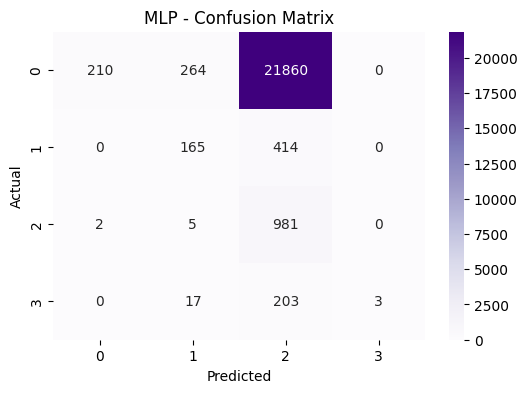

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_mlp = mlp_model.predict(X_test)

print("🎯 Accuracy (MLP):", accuracy_score(y_test, y_pred_mlp))
print("\n📋 Classification Report (MLP):\n", classification_report(y_test, y_pred_mlp))

cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("MLP - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**🔥 Stacking Ensemble**

In [62]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [63]:
# Base learners
base_learners = [
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
]

# Meta learner
meta_model = LogisticRegression(max_iter=1000)

**Create the Stacking Model**

In [64]:
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

In [65]:
stack_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression(max_iter=1000),
                   n_jobs=-1)

🎯 Accuracy (Stacked): 0.9333858398275576

📋 Classification Report (Stacked):
               precision    recall  f1-score   support

           0       0.93      1.00      0.97     22334
           1       0.86      0.32      0.46       579
           2       0.80      0.00      0.01       988
           3       1.00      0.03      0.05       223

    accuracy                           0.93     24124
   macro avg       0.90      0.34      0.37     24124
weighted avg       0.93      0.93      0.91     24124



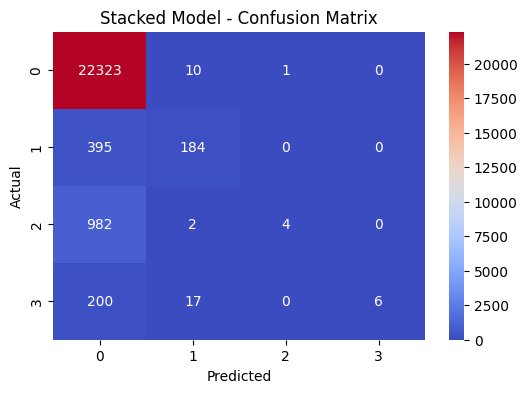

In [66]:
y_pred_stack = stack_model.predict(X_test)

print("🎯 Accuracy (Stacked):", accuracy_score(y_test, y_pred_stack))
print("\n📋 Classification Report (Stacked):\n", classification_report(y_test, y_pred_stack))

cm = confusion_matrix(y_test, y_pred_stack)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.title("Stacked Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [67]:
import joblib

# Save the best model
joblib.dump(xgb_model, 'xgboost_dns_model.pkl')

print("✅ Model saved successfully as 'xgboost_dns_model.pkl'")

✅ Model saved successfully as 'xgboost_dns_model.pkl'


In [68]:
!cp xgboost_dns_model.pkl /content/drive/MyDrive/
print("☁️ Model also copied to Google Drive.")

☁️ Model also copied to Google Drive.


In [69]:
# Assuming you have df_all loaded from before
df_all.drop(columns=['label']).sample(15, random_state=42).to_csv("dns_test_logs.csv", index=False)


In [70]:
from joblib import dump
# Assuming rf_model is the RandomForestClassifier instance
dump(rf_model, 'random_forest_dns_model.joblib')


['random_forest_dns_model.joblib']